<a href="https://colab.research.google.com/github/beingfadil/ML-by-ict-academy/blob/main/linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pandas
import pandas as pd
import numpy as np

In [19]:
from google.colab import files
files.upload()

Saving Student_Marks.csv to Student_Marks.csv


{'Student_Marks.csv': b'number_courses,time_study,Marks\r\n3,4.508,19.202\r\n4,0.096,7.734\r\n4,3.133,13.811\r\n6,7.909,53.018\r\n8,7.811,55.299\r\n6,3.211,17.822\r\n3,6.063,29.889\r\n5,3.413,17.264\r\n4,4.410,20.348\r\n3,6.173,30.862\r\n3,7.353,42.036\r\n7,0.423,12.132\r\n7,4.218,24.318\r\n3,4.274,17.672\r\n3,2.908,11.397\r\n4,4.260,19.466\r\n5,5.719,30.548\r\n8,6.080,38.490\r\n6,7.711,50.986\r\n8,3.977,25.133\r\n4,4.733,22.073\r\n6,6.126,35.939\r\n5,2.051,12.209\r\n7,4.875,28.043\r\n4,3.635,16.517\r\n3,1.407,6.623\r\n7,0.508,12.647\r\n8,4.378,26.532\r\n5,0.156,9.333\r\n4,1.299,8.837\r\n8,3.864,24.172\r\n3,1.923,8.100\r\n8,0.932,15.038\r\n6,6.594,39.965\r\n3,4.083,17.171\r\n3,7.543,43.978\r\n4,2.966,13.119\r\n6,7.283,46.453\r\n7,6.533,41.358\r\n6,7.775,51.142\r\n4,0.140,7.336\r\n6,2.754,15.725\r\n6,3.591,19.771\r\n5,1.557,10.429\r\n4,1.954,9.742\r\n3,2.061,8.924\r\n4,3.797,16.703\r\n4,4.779,22.701\r\n3,5.635,26.882\r\n5,3.913,19.106\r\n6,6.703,40.602\r\n6,4.130,22.184\r\n4,0.771,7.892

In [22]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('Student_Marks.csv', index_col=0)

# display the first 5 rows
data.head(10)

,time_study,Marks
number_courses,,
3,4.508,19.202
4,0.096,7.734
4,3.133,13.811
6,7.909,53.018
8,7.811,55.299
6,3.211,17.822
3,6.063,29.889
5,3.413,17.264
4,4.410,20.348


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [23]:
# display the last 5 rows
data.tail()

,time_study,Marks
number_courses,,
6,3.561,19.128
3,0.301,5.609
4,7.163,41.444
7,0.309,12.027
3,6.335,32.357


In [24]:
# check the shape of the DataFrame (rows, columns)
data.shape

(100, 2)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data


In [45]:
# conventional way to import seaborn
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline
data.reset_index(inplace=True)

<Axes: xlabel='number_courses', ylabel='Marks'>

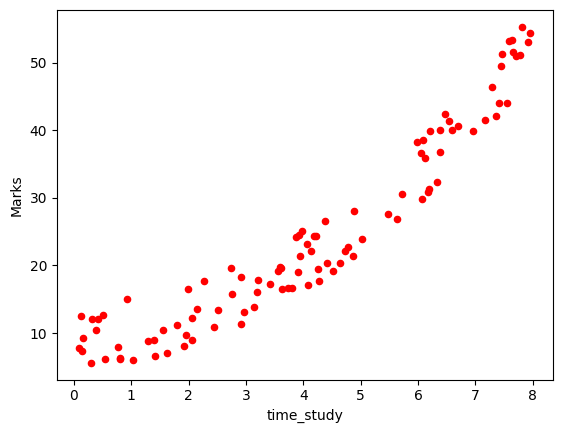

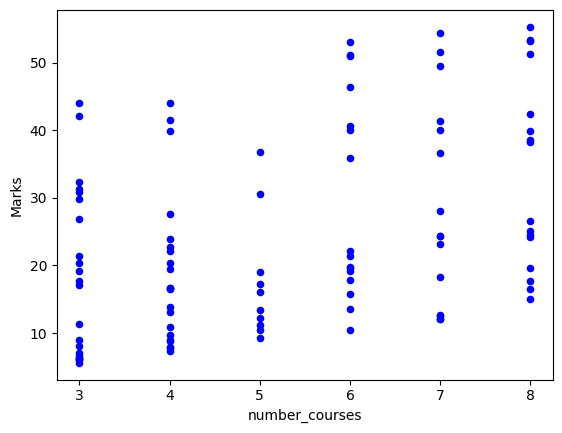

In [46]:
data.plot(kind='scatter',x='time_study',y='Marks',color='red')
data.plot(kind='scatter',x='number_courses',y='Marks',color='blue')


## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [47]:
# create a Python list of feature names
feature_cols = ['number_courses', 'time_study']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['number_courses','time_study']]

# print the first 5 rows
X.head()


,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811


In [48]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(100, 2)


In [49]:
# select a Series from the DataFrame
lab = ['Marks']

# equivalent command that works if there are no spaces in the column name
y =  data['Marks']



# print the first 5 values
y.head()

0    19.202
1     7.734
2    13.811
3    53.018
4    55.299
Name: Marks, dtype: float64

In [50]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(100,)


## Splitting X and y into training and testing sets

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [52]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train = X_train[:150]

print(X_test)

(75, 2)
(75,)
(25, 2)
(25,)
    number_courses  time_study
80               7       7.957
84               8       1.982
33               6       6.594
81               8       2.262
93               8       6.471
17               8       6.080
36               4       2.966
82               4       7.410
69               6       3.948
65               6       2.142
92               4       5.027
39               6       7.775
56               8       7.641
52               4       0.771
51               6       4.130
32               8       0.932
31               3       1.923
44               4       1.954
78               7       7.451
10               3       7.353
2                4       3.133
73               3       1.629
97               4       7.163
62               6       3.606
19               8       3.977


## Linear regression in scikit-learn

In [53]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
model = linreg.fit(X_train, y_train)



### Making predictions

In [54]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)
print(X_test)

[47.55733119 18.8722928  38.61601837 20.30802166 41.89010291 39.88521011
 16.10829478 38.89536275 25.04838069 15.78792957 26.67628467 44.67171758
 47.88939848  4.85320607 25.98160445 13.48830959  8.80781493 10.91916049
 44.96276404 36.65069951 16.96460449  7.30029964 37.62884479 23.29474045
 29.10186089]
    number_courses  time_study
80               7       7.957
84               8       1.982
33               6       6.594
81               8       2.262
93               8       6.471
17               8       6.080
36               4       2.966
82               4       7.410
69               6       3.948
65               6       2.142
92               4       5.027
39               6       7.775
56               8       7.641
52               4       0.771
51               6       4.130
32               8       0.932
31               3       1.923
44               4       1.954
78               7       7.451
10               3       7.353
2                4       3.133
73          

We need an **evaluation metric** in order to compare our predictions with the actual values!